In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [334]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Датасет для обучения: ')
print(df_train.info())
print('Датасет для тестирования: ')
print(df_test.info())


Датасет для обучения: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null 

In [335]:
print(df_train.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [336]:
print('До удаления пустых значений:', len(df_train))
df_train = df_train.dropna()
print('После: ', len(df_train))





До удаления пустых значений: 2000
После:  2000


In [337]:
numeric_cols = df_train.columns.drop(['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi',
                              'price_range',
                              ])
print(numeric_cols)
categoric_cols = df_train.columns.drop(numeric_cols)
print(categoric_cols)

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time'],
      dtype='object')
Index(['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen',
       'wifi', 'price_range'],
      dtype='object')


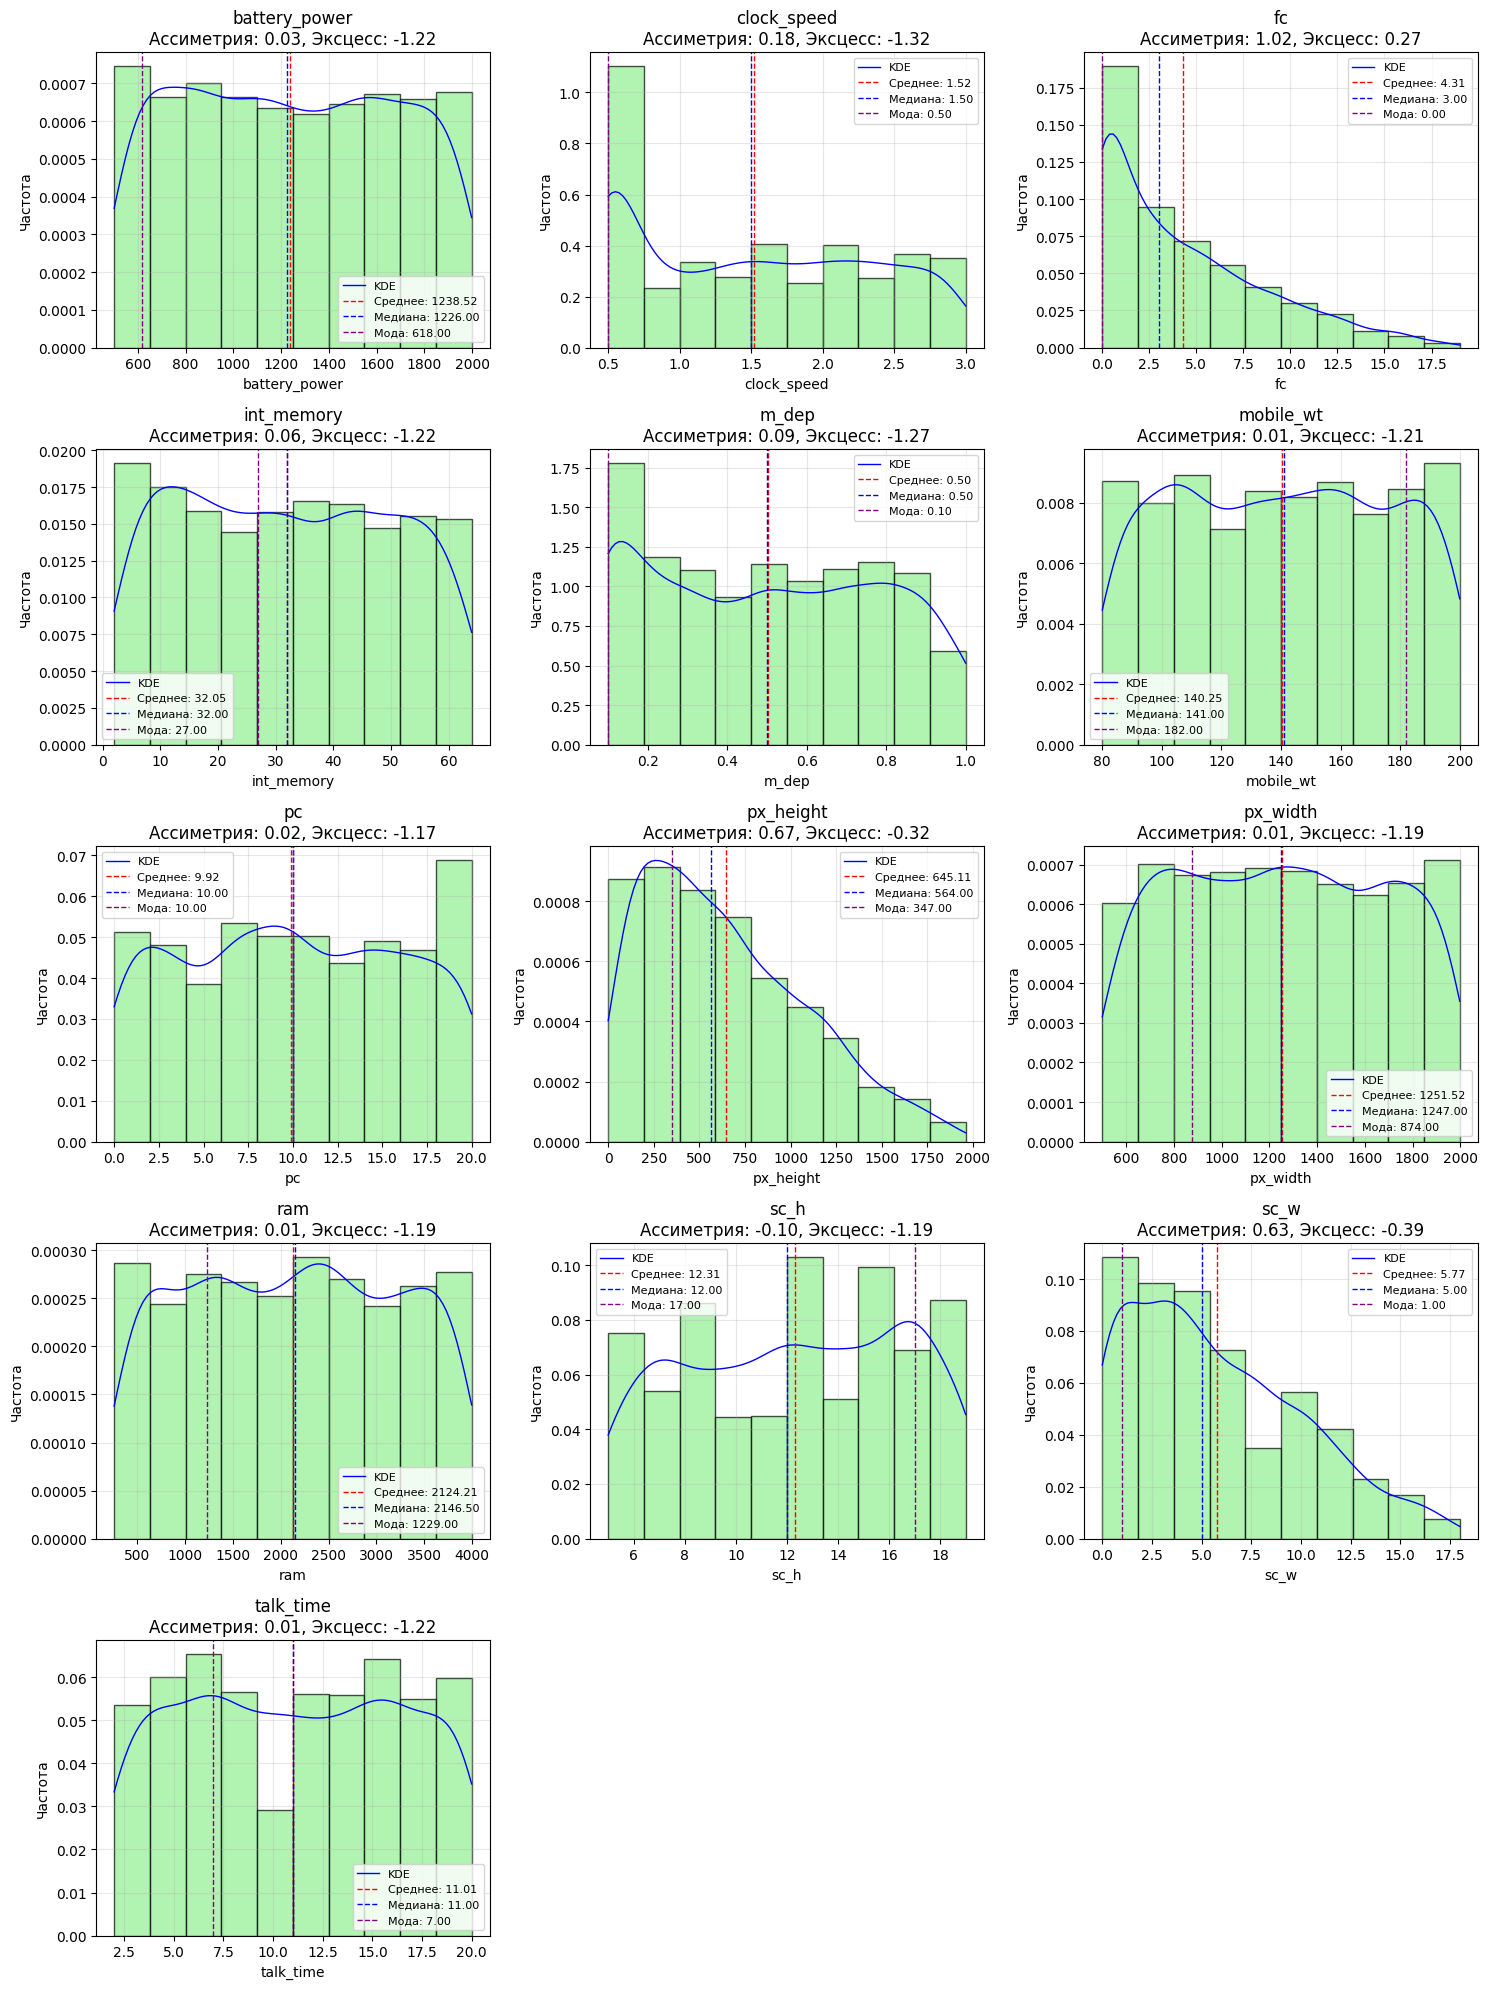

In [338]:
cols = numeric_cols
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.ravel()

for i, col in enumerate(cols):
    data = df_train[col]

    his = axes[i].hist(data, edgecolor='black', density=True, alpha=0.7, color='lightgreen')

    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode()[0]
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
        
    kde = stats.gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    kde_curve = kde(x_range)
    axes[i].plot(x_range, kde_curve, 'b-', linewidth=1, label='KDE')
        
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Среднее: {mean_val:.2f}')
    axes[i].axvline(median_val, color='blue', linestyle='--', linewidth=1, label=f'Медиана: {median_val:.2f}')
    axes[i].axvline(mode_val, color='purple', linestyle='--', linewidth=1, label=f'Мода: {mode_val:.2f}')
        
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].set_title(f'{col}\nАссиметрия: {skewness:.2f}, Эксцесс: {kurtosis:.2f}')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [339]:
print(" ОТБОР НАИБОЛЕЕ ИНФОРМАТИВНЫХ ПРИЗНАКОВ")

X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({
    'Признак': X.columns,
    'F-score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values('F-score', ascending=False)

print("\nРЕЙТИНГ ПРИЗНАКОВ ПО ИНФОРМАТИВНОСТИ:")
display(feature_scores.style.background_gradient(subset=['F-score'], cmap='viridis')
        .format({'F-score': '{:.2f}', 'p-value': '{:.2e}'}))

 ОТБОР НАИБОЛЕЕ ИНФОРМАТИВНЫХ ПРИЗНАКОВ

РЕЙТИНГ ПРИЗНАКОВ ПО ИНФОРМАТИВНОСТИ:


,Признак,F-score,p-value
13,ram,3520.11,0.00e+00
0,battery_power,31.60,5.95e-20
12,px_width,22.62,2.12e-14
11,px_height,19.48,1.89e-12
8,mobile_wt,3.59,1.31e-02
6,int_memory,2.92,3.28e-02
9,n_cores,2.63,4.89e-02
14,sc_h,2.23,8.32e-02
15,sc_w,1.67,1.71e-01
16,talk_time,1.63,1.81e-01


C:\Users\Nikita\AppData\Local\Temp\ipykernel_14100\240194527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_scores, x='F-score', y='Признак', palette='viridis')


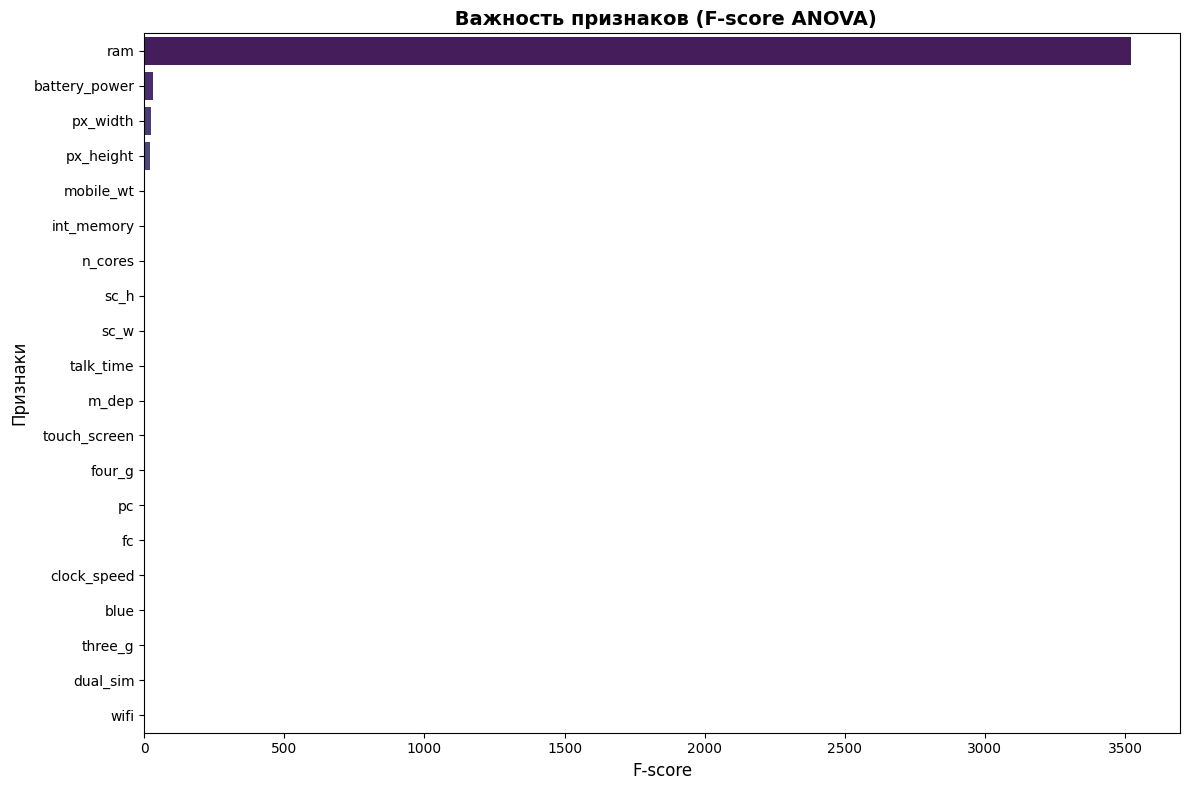


 ТОП-10 НАИБОЛЕЕ ИНФОРМАТИВНЫХ ПРИЗНАКОВ:
 1. ram                  (F-score: 3520.11)
 2. battery_power        (F-score: 31.60)
 3. px_width             (F-score: 22.62)
 4. px_height            (F-score: 19.48)
 5. mobile_wt            (F-score: 3.59)
 6. int_memory           (F-score: 2.92)
 7. n_cores              (F-score: 2.63)
 8. sc_h                 (F-score: 2.23)
 9. sc_w                 (F-score: 1.67)
10. talk_time            (F-score: 1.63)


In [340]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_scores, x='F-score', y='Признак', palette='viridis')
plt.title(' Важность признаков (F-score ANOVA)', fontsize=14, fontweight='bold')
plt.xlabel('F-score', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.tight_layout()
plt.show()

top_features = 10
top_features_names = feature_scores.head(top_features)['Признак'].values

print(f"\n ТОП-{top_features} НАИБОЛЕЕ ИНФОРМАТИВНЫХ ПРИЗНАКОВ:")
for i, feature in enumerate(top_features_names, 1):
    score = feature_scores[feature_scores['Признак'] == feature]['F-score'].values[0]
    print(f"{i:2d}. {feature:20} (F-score: {score:.2f})")

In [341]:
scaler = StandardScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

In [342]:
ds_X = df_train.drop(['price_range'], axis=1)
ds_y = df_train['price_range']

In [343]:
X_train, X_test, y_train, y_test = train_test_split(
    ds_X, ds_y, test_size=0.2, random_state=42
)




In [344]:
# df_test[numeric_cols] = scaler.fit_transform(df_test[numeric_cols])

In [345]:
# X_test = df_test.drop('id', axis=1)

In [346]:
clf = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=5)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [347]:
y_predicted = clf.predict(X_test)

In [348]:
# accuracy = accuracy_score(y_test, y_predicted)
# precision_macro = precision_score(y_test, y_predicted, average='macro')
# precision_micro = precision_score(y_test, y_predicted, average='micro')
# recall_macro = recall_score(y_test, y_predicted, average='macro')
# recall_micro = recall_score(y_test, y_predicted, average='micro')
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision (macro avg): {precision_macro:.4f}")
# print(f"Precision (micro avg): {precision_micro:.4f}")
# print(f"Recall (macro avg): {recall_macro:.4f}")
# print(f"Recall (micro avg): {recall_micro:.4f}")

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize

# Твоя модель предсказала:
# y_predicted = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_predicted)

# Precision
precision_macro = precision_score(y_test, y_predicted, average='macro')
precision_micro = precision_score(y_test, y_predicted, average='micro')

# Recall
recall_macro = recall_score(y_test, y_predicted, average='macro')
recall_micro = recall_score(y_test, y_predicted, average='micro')

# F1-score
f1_macro = f1_score(y_test, y_predicted, average='macro')
f1_micro = f1_score(y_test, y_predicted, average='micro')

# AUC: нужно бинаризовать целевые метки для многоклассовой задачи
y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))
y_pred_bin = label_binarize(y_predicted, classes=sorted(set(y_test)))

auc_macro = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
auc_micro = roc_auc_score(y_test_bin, y_pred_bin, average='micro')

# Вывод всех метрик
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro avg): {precision_macro:.4f}")
print(f"Precision (micro avg): {precision_micro:.4f}")
print(f"Recall (macro avg): {recall_macro:.4f}")
print(f"Recall (micro avg): {recall_micro:.4f}")
print(f"F1-score (macro avg): {f1_macro:.4f}")
print(f"F1-score (micro avg): {f1_micro:.4f}")
print(f"AUC (macro avg): {auc_macro:.4f}")
print(f"AUC (micro avg): {auc_micro:.4f}")



Accuracy: 0.8525
Precision (macro avg): 0.8525
Precision (micro avg): 0.8525
Recall (macro avg): 0.8504
Recall (micro avg): 0.8525
F1-score (macro avg): 0.8496
F1-score (micro avg): 0.8525
AUC (macro avg): 0.9009
AUC (micro avg): 0.9017


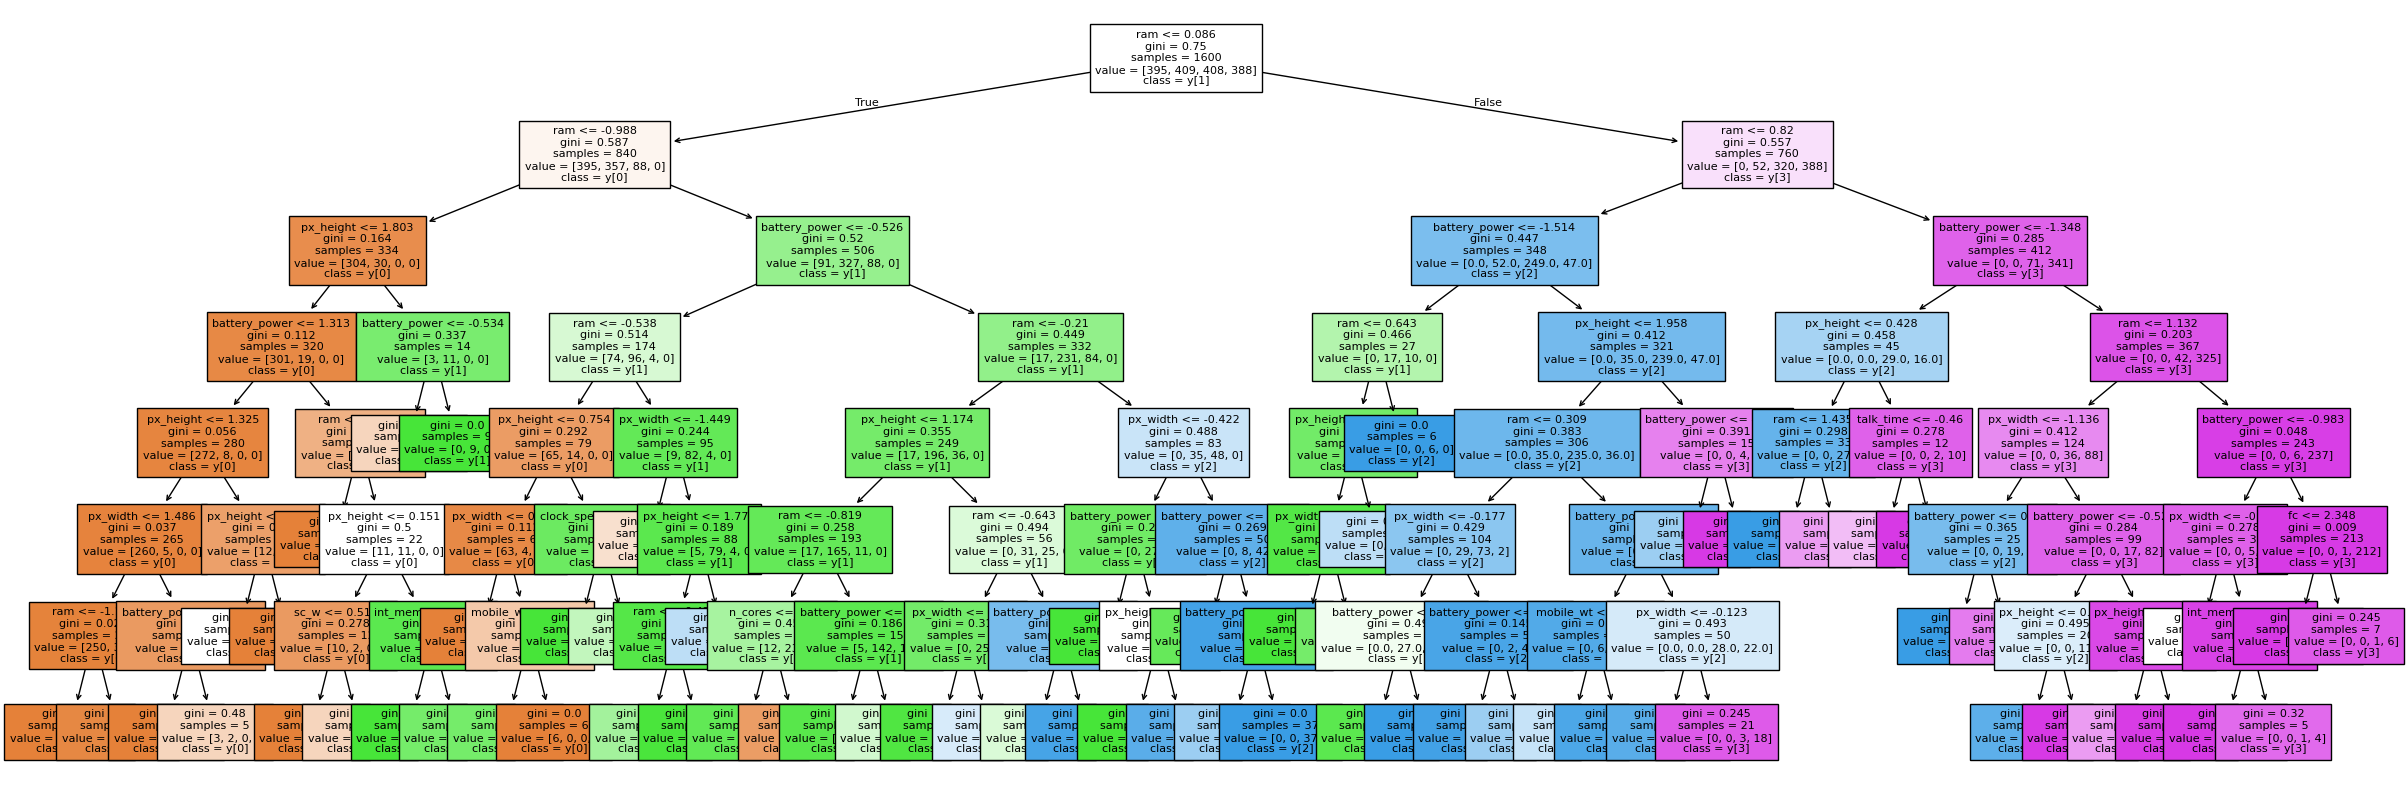

In [349]:
plt.figure(figsize=(30,10))
features = df_train.columns.drop('price_range')
# classes = df_train.columns.drop(features)
plot_tree(clf, feature_names=features, class_names=True, filled=True, fontsize=8)
plt.show()

In [350]:
svc = LinearSVC(loss='squared_hinge', max_iter=10000, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
#     feature1_name, feature2_name = X.columns[feature_indexes]
#     X_feature_columns = X.values[:, feature_indexes]
#     X_train_feature_columns = X_train[:, feature_indexes]
#     clf.fit(X_train_feature_columns, y_train)

#     plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
#     plt.xlabel(feature1_name)
#     plt.ylabel(feature2_name)
#     plt.title(title)


# decision_boundary_plot(ds_X, ds_y, X_train, y_train, svc, [0, 1, 2, 3], 'Линейный SVC')

In [351]:
# accuracy_svc = accuracy_score(y_test, y_pred_svc)
# precision_macro_svc = precision_score(y_test, y_pred_svc, average='macro')
# precision_micro_svc = precision_score(y_test, y_pred_svc, average='micro')
# recall_macro_svc = recall_score(y_test, y_pred_svc, average='macro')
# recall_micro_svc = recall_score(y_test, y_pred_svc, average='micro')
# print(f"Accuracy: {accuracy_svc:.4f}")
# print(f"Precision (macro avg): {precision_macro_svc:.4f}")
# print(f"Precision (micro avg): {precision_micro_svc:.4f}")
# print(f"Recall (macro avg): {recall_macro_svc:.4f}")
# print(f"Recall (micro avg): {recall_micro_svc:.4f}")

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize

# Твоя модель предсказала:
# y_predicted = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_predicted)

# Precision
precision_macro = precision_score(y_test, y_predicted, average='macro')
precision_micro = precision_score(y_test, y_predicted, average='micro')

# Recall
recall_macro = recall_score(y_test, y_predicted, average='macro')
recall_micro = recall_score(y_test, y_predicted, average='micro')

# F1-score
f1_macro = f1_score(y_test, y_predicted, average='macro')
f1_micro = f1_score(y_test, y_predicted, average='micro')

# AUC: нужно бинаризовать целевые метки для многоклассовой задачи
y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))
y_pred_bin = label_binarize(y_predicted, classes=sorted(set(y_test)))

auc_macro = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
auc_micro = roc_auc_score(y_test_bin, y_pred_bin, average='micro')

# Вывод всех метрик
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro avg): {precision_macro:.4f}")
print(f"Precision (micro avg): {precision_micro:.4f}")
print(f"Recall (macro avg): {recall_macro:.4f}")
print(f"Recall (micro avg): {recall_micro:.4f}")
print(f"F1-score (macro avg): {f1_macro:.4f}")
print(f"F1-score (micro avg): {f1_micro:.4f}")
print(f"AUC (macro avg): {auc_macro:.4f}")
print(f"AUC (micro avg): {auc_micro:.4f}")


Accuracy: 0.8525
Precision (macro avg): 0.8525
Precision (micro avg): 0.8525
Recall (macro avg): 0.8504
Recall (micro avg): 0.8525
F1-score (macro avg): 0.8496
F1-score (micro avg): 0.8525
AUC (macro avg): 0.9009
AUC (micro avg): 0.9017


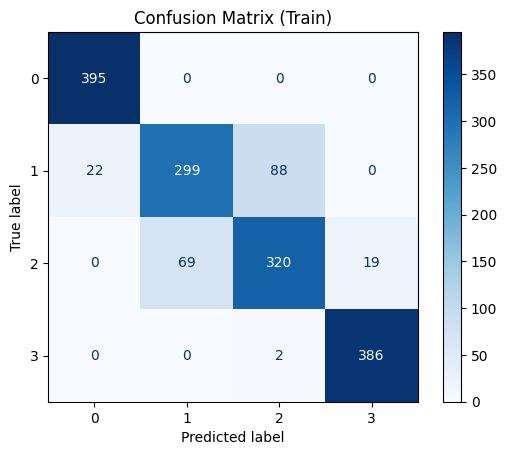

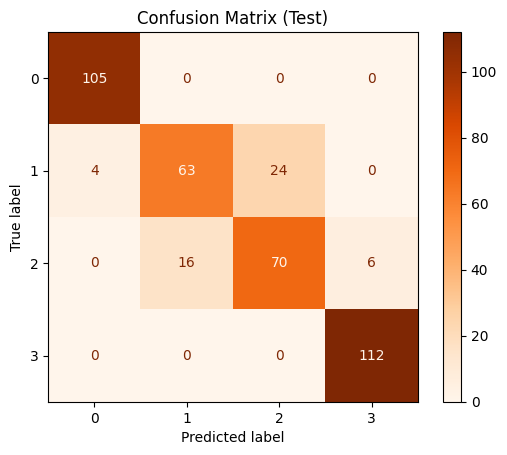

In [352]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title('Confusion Matrix (Train)')
plt.show()


y_pred_test = svc.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Oranges')
plt.title('Confusion Matrix (Test)')
plt.show()


In [353]:
important_features = ['ram', 'battery_power', 'px_width', 'px_height']

important_features.append('price_range')  

df_trainClr = df_train[important_features]

print(df_trainClr.head())

        ram  battery_power  px_width  px_height  price_range
0  0.391703      -0.902597 -1.146784  -1.408949            1
1  0.467317      -0.495139  1.704465   0.585778            2
2  0.441498      -1.537686  1.074968   1.392684            2
3  0.594569      -1.419319  1.236971   1.286750            2
4 -0.657666       1.325906 -0.091452   1.268718            1


Accuracy: 0.8550
Precision (macro avg): 0.8544
Precision (micro avg): 0.8550
Recall (macro avg): 0.8527
Recall (micro avg): 0.8550


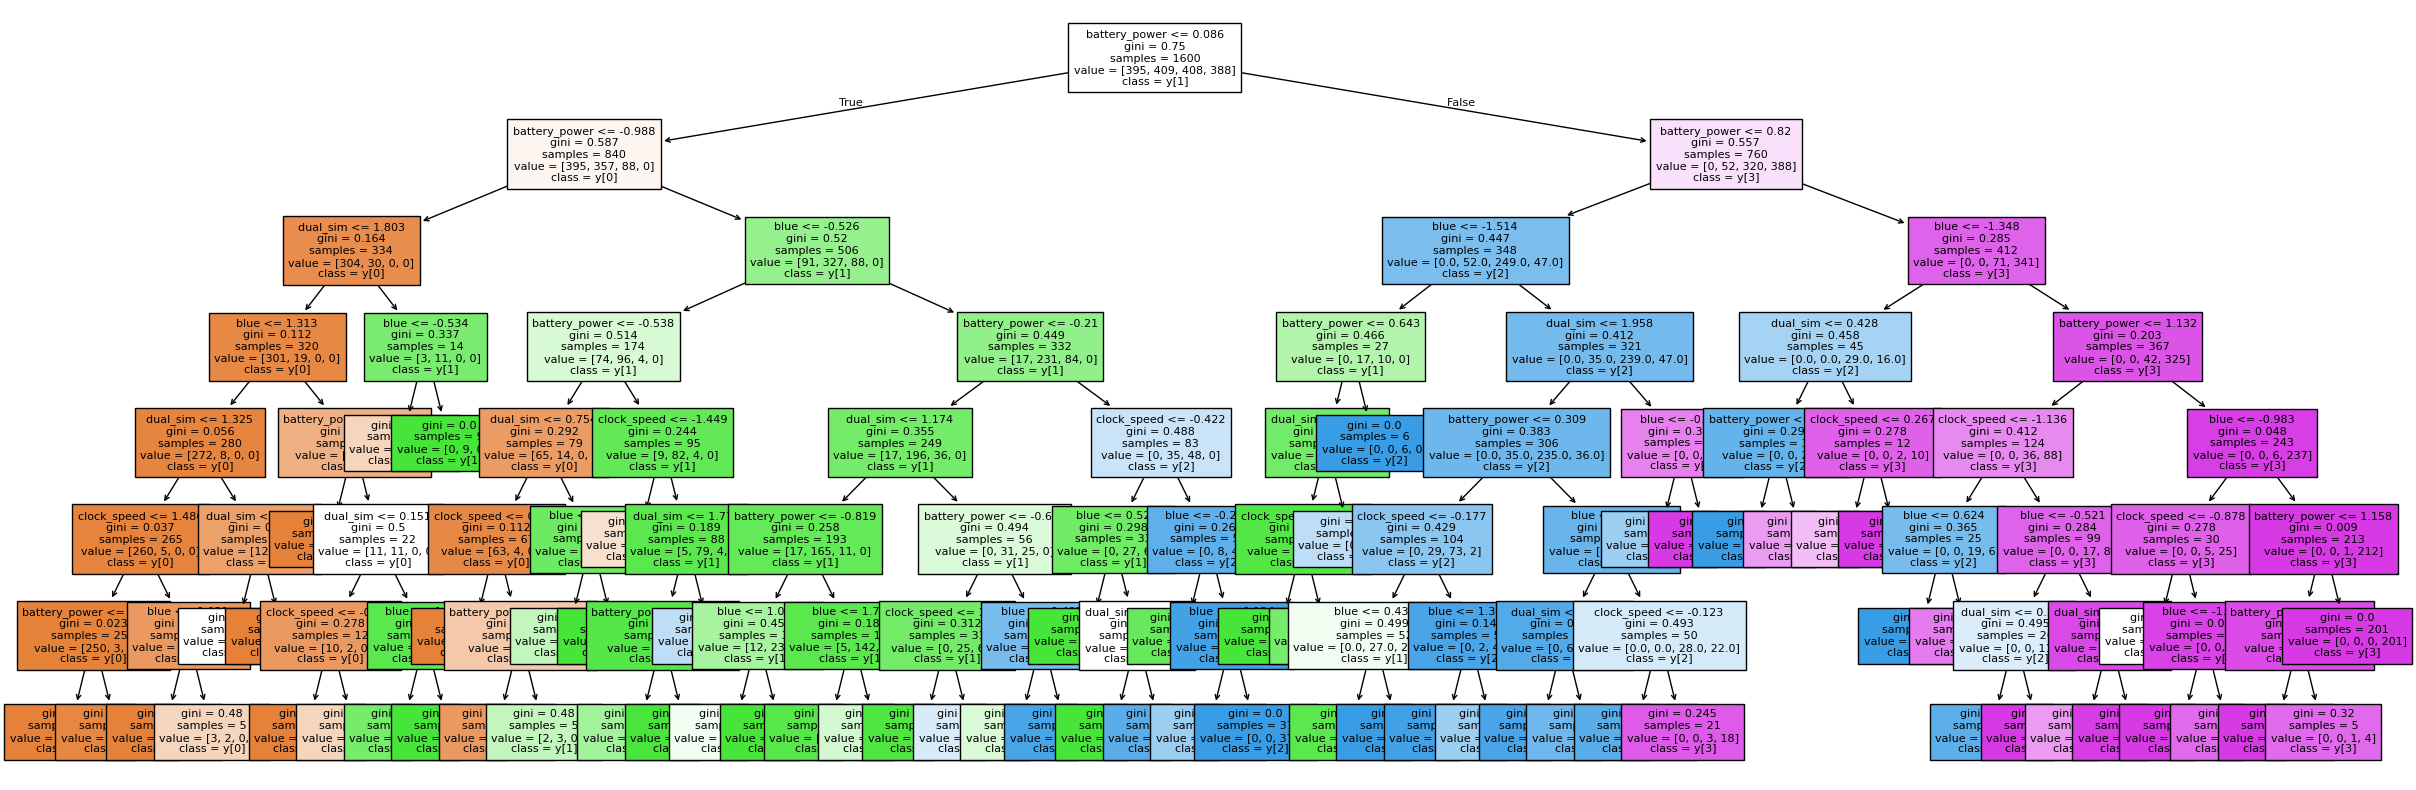

In [354]:

ds_X = df_trainClr.drop(['price_range'], axis=1)
ds_y = df_trainClr['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    ds_X, ds_y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=5)
clf.fit(X_train, y_train)


y_predicted = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_predicted)
precision_macro = precision_score(y_test, y_predicted, average='macro')
precision_micro = precision_score(y_test, y_predicted, average='micro')
recall_macro = recall_score(y_test, y_predicted, average='macro')
recall_micro = recall_score(y_test, y_predicted, average='micro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro avg): {precision_macro:.4f}")
print(f"Precision (micro avg): {precision_micro:.4f}")
print(f"Recall (macro avg): {recall_macro:.4f}")
print(f"Recall (micro avg): {recall_micro:.4f}")

plt.figure(figsize=(30,10))
features = df_train.columns.drop('price_range')
# classes = df_train.columns.drop(features)
plot_tree(clf, feature_names=features, class_names=True, filled=True, fontsize=8)
plt.show()



Accuracy: 0.8525
Precision (macro avg): 0.8525
Precision (micro avg): 0.8525
Recall (macro avg): 0.8504
Recall (micro avg): 0.8525

In [355]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

# Инициализация модели
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Обучение
rf.fit(X_train, y_train)

# Предсказание
y_pred_rf = rf.predict(X_test)

# Метрики
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest):
[[101   4   0   0]
 [  2  88   1   0]
 [  0   6  82   4]
 [  0   0   7 105]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.90      0.97      0.93        91
           2       0.91      0.89      0.90        92
           3       0.96      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

